<a href="https://colab.research.google.com/github/ucfilho/Metodos_Numericos_2021/blob/main/Mod_04_class_09_Eq_Onda_PDE_jun_29_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from mayavi import mlab


# size of the system
x0,xmax,NX = -1.5,1.5,100
y0,ymax,NY = x0,xmax,NX


X = np.linspace(x0,xmax,NX)
Y = X

# evolution time
t0,tmax,NT=0,4,400
T = np.linspace(t0,tmax,NT)
dT = T[1]-T[0]

# initial condition
XX,YY = np.meshgrid(X,Y)
f = np.exp(-10*(XX**2+YY**2))
G = np.zeros((NX,NY))

# speed constant
c = 1.0

# Courant constant
dX, dY, dT = X[1]-X[0], Y[1]-Y[0], T[1]-T[0]
gx, gy = c*dT/dX, c*dT/dY
gx2, gy2 = gx**2, gy**2
g = 2.0*(1.0 - gx2 - gy2)

# declare the solution
u = np.zeros((NY,NX,NT+1))

# initial condition
u[:,:,0] = f

# compute the first time step
u[:,:,1] = g/2.0*u[:,:,0] + dT*G
u[1:-1,1:-1,1] += gx2/2.*(f[1:-1,2:]+f[1:-1,:-2])
u[1:-1,1:-1,1] += gy2/2.*(f[2:,1:-1]+f[:-2,1:-1])

for k in range(1,NT):

 # all the terms have those ones
 u[:,:,k+1] = g*u[:,:,k] - u[:,:,k-1]

 # interior point
 u[1:-1,1:-1,k+1] += gx2*(u[1:-1,2:,k]+u[1:-1,:-2,k])
 u[1:-1,1:-1,k+1] += gy2*(u[2:,1:-1,k]+u[:-2,1:-1,k])

 # boundary conditions (corners)
 u[0,0,k+1] = u[1,1,k+1]
 u[-1,0,k+1] = u[-2,1,k+1]
 u[0,-1,k+1] = u[1,-2,k+1]
 u[-1,-1,k+1] = u[-2,-2,k+1]

 # boundary conditions (sides)

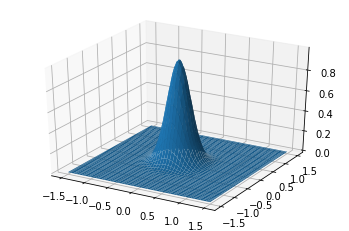

In [ ]:
# show the matrix in 3D
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.cla()
surf = ax.plot_surface(XX, YY, u[:,:,0])


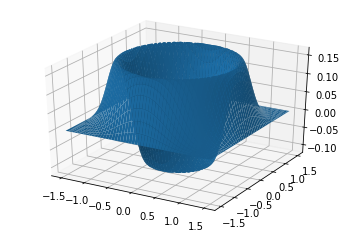

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.cla()
surf = ax.plot_surface(XX, YY, u[:,:,100])

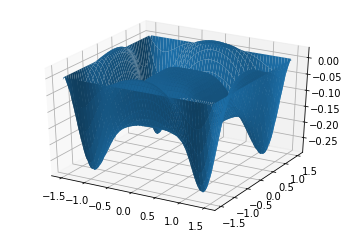

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.cla()
surf = ax.plot_surface(XX, YY, u[:,:,200])

In [ ]:
u.shape

(100, 100, 401)